## Import

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

In [2]:
from ML.utils.utils import *
from ML.utils.Data_preparator import Data_preparator
from ML.utils.Model_evaluator import Model_evaluator
from physics.Iso_data_handler import Iso_data_handler
from physics.Data_visualiser import Data_visualiser

In [ ]:
physical_model = "MIST"
path_to_data = "../../../../../../data/MIST_v1.2_vvcrit0.0_basic_isos/"
path_to_results = "../../../../../../results/K_fold/"
path_to_predictions = "../../../../../../predictions/K_fold"
tag = "mass_filtered_smaller_3"

## Data preparation

This notebook contains the results of the model which are trained using all the data from MIST and filtered on the phases

Reading MIST dataframe from csv file...


,log10_isochrone_age_yr,log_Teff,log_g,phase,metallicity,star_mass,log_R
0,5.0,3.486221,3.131342,-1.0,-0.25,0.100000,0.153402
1,5.0,3.487362,3.126808,-1.0,-0.25,0.102645,0.160326
2,5.0,3.489243,3.119367,-1.0,-0.25,0.107039,0.171785
3,5.0,3.491102,3.112165,-1.0,-0.25,0.111419,0.183099
4,5.0,3.492937,3.105143,-1.0,-0.25,0.115789,0.194305
...,...,...,...,...,...,...,...
1467117,10.3,4.402490,7.777159,6.0,0.50,0.532726,-1.806255
1467118,10.3,4.387132,7.783242,6.0,0.50,0.532730,-1.809295
1467119,10.3,4.371789,7.789130,6.0,0.50,0.532735,-1.812237
1467120,10.3,4.356480,7.794844,6.0,0.50,0.532741,-1.815091


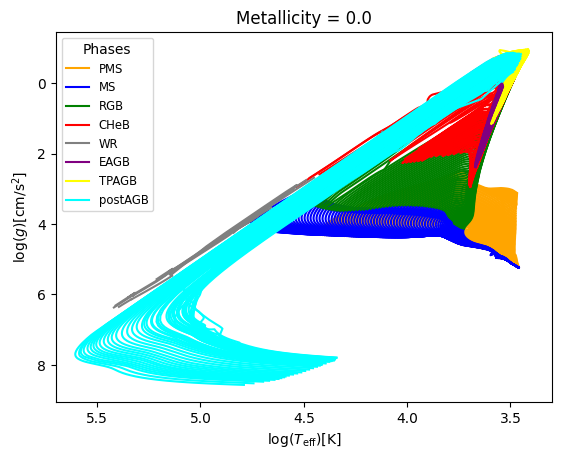

In [ ]:
iso_handler = Iso_data_handler(path_to_data, 
                              ['log10_isochrone_age_yr', 'log_Teff', 'log_g', 'phase', 'metallicity', 'star_mass', 'log_R'], 
                              physical_model, reclassify=True)

iso_df = iso_handler.get_isochrone_dataframe()
display(iso_df)
data_visualiser = Data_visualiser(iso_df, physical_model)
data_visualiser.plot_Kiel([], [0.0])

In [25]:
print_uniques("star_mass", iso_df)
# print_uniques_count("star_mass", iso_df)

star_mass : 1467117 unique values, range [0.0999979840073621, 298.5447575808816]


,log10_isochrone_age_yr,log_Teff,log_g,phase,metallicity,star_mass,log_R
0,5.0,4.494412,4.346972,0.0,-0.25,13.584360,0.610679
1,5.0,4.497517,4.345776,0.0,-0.25,13.765512,0.614753
2,5.0,4.500556,4.344580,0.0,-0.25,13.942887,0.618755
3,5.0,4.504040,4.343050,0.0,-0.25,14.591712,0.624670
4,5.0,4.507576,4.341483,0.0,-0.25,15.426062,0.631187
...,...,...,...,...,...,...,...
1140739,10.3,3.425746,-0.551440,5.0,0.50,0.602856,2.384899
1140740,10.3,3.426469,-0.560350,5.0,0.50,0.598549,2.387797
1140741,10.3,3.427744,-0.566057,5.0,0.50,0.594116,2.389036
1140742,10.3,3.429413,-0.569225,5.0,0.50,0.589648,2.388981


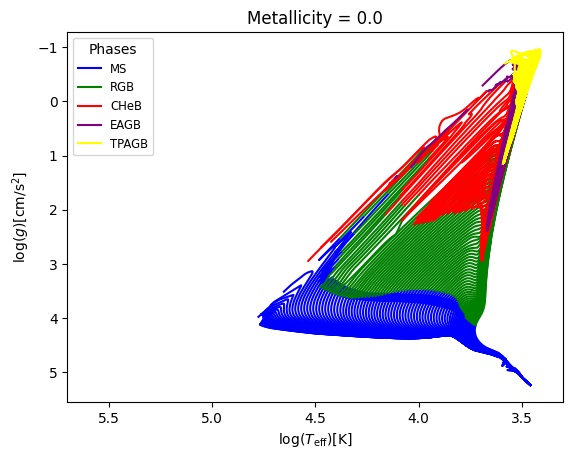

In [ ]:
phase_filtered_iso_df = Data_preparator.filter_data(iso_df, {'phase':[0, 2, 3, 4, 5]})
display(phase_filtered_iso_df)
data_visualiser_phase_filtered = Data_visualiser(phase_filtered_iso_df, physical_model)
data_visualiser_phase_filtered.plot_Kiel([], [0.0])

In [ ]:
print_uniques("star_mass", phase_filtered_iso_df)
# print_uniques_count("star_mass", phase_filtered_iso_df)

star_mass : 1140739 unique values, range [0.0999979840073621, 298.5447575808816]


,log10_isochrone_age_yr,log_Teff,log_g,phase,metallicity,star_mass,log_R
0,6.50,4.126429,4.449033,0.0,-0.25,2.859137,0.222566
1,6.50,4.130406,4.448602,0.0,-0.25,2.900395,0.225872
2,6.50,4.134480,4.448201,0.0,-0.25,2.941695,0.229166
3,6.50,4.138527,4.447853,0.0,-0.25,2.982876,0.232424
4,6.55,4.113582,4.450139,0.0,-0.25,2.734122,0.212411
...,...,...,...,...,...,...,...
724787,10.30,3.425746,-0.551440,5.0,0.50,0.602856,2.384899
724788,10.30,3.426469,-0.560350,5.0,0.50,0.598549,2.387797
724789,10.30,3.427744,-0.566057,5.0,0.50,0.594116,2.389036
724790,10.30,3.429413,-0.569225,5.0,0.50,0.589648,2.388981


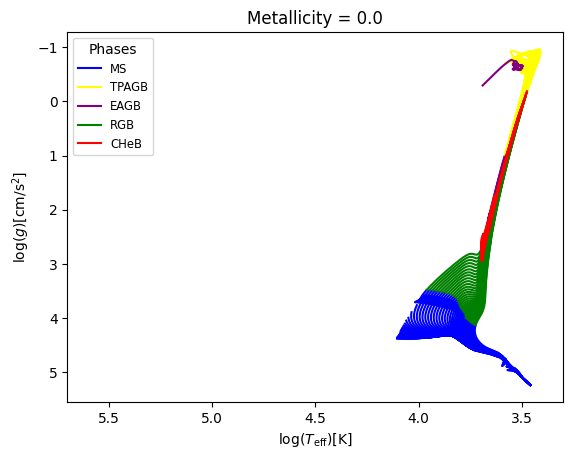

In [ ]:
phase_mass_filtered_iso_df = Data_preparator.filter_data(iso_df, {'phase':[0, 2, 3, 4, 5], "star_mass" : ("<", 3)})
display(phase_mass_filtered_iso_df)
data_visualiser_phase_age_filtered = Data_visualiser(phase_mass_filtered_iso_df, physical_model)
data_visualiser_phase_age_filtered.plot_Kiel([], [0.0])

In [12]:
X_train, X_ivs, y_train, y_ivs = \
    Data_preparator.split_data(phase_mass_filtered_iso_df, x_cols=['log10_isochrone_age_yr', 'log_Teff', 'log_g', 'metallicity'], 
                               y_cols=['star_mass', 'log_R'], random_state=12, print_stats=True)

print(X_train.shape, X_ivs.shape)
print(y_train.shape, y_ivs.shape)

Training set statistics:
Range in train data for the mass parameter : 0.0999982007747928 - 2.9999929785625152
Median value in train data for the mass parameter: 1.320010623020954
Mean value in train data for the mass parameter: 1.4429831556116748
Range in train data for the radius parameter : -0.9974747647513328 - 2.8847578818739312
Median value in train data for the radius parameter: 1.799658214320394
Mean value in train data for the radius parameter: 1.3973309765654676

Testing set statistics:
Range in test data for the mass parameter : 0.0999979840073621 - 2.999922893130419
Median value in test data for the mass parameter: 1.3178098024056082
Mean value in test data for the mass parameter: 1.4427295430882516
Range in test data for the radius parameter : -0.9974234436680278 - 2.884599061606642
Median value in test data for the radius parameter: 1.7903209563492541
Mean value in test data for the radius parameter: 1.3945694711746177

(543594, 4) (181198, 4)
(543594, 2) (181198, 2)


## Model training

### Linear regression

In [ ]:
lr_evaluator = Model_evaluator("linear_regression", path=path_to_results, physical_model=physical_model)


mass_filtered_smaller_3 train data :
split 1 2 3 4 5 6 7 8 9 10 
mass results:
RVE :  0.6420705205101145
RMSE :  0.4133922074746432
MAE :  0.32228610358547094
MedAE :  0.2638735171168136
CORR :  0.8012930304228295
MAX_ER :  1.7992423967993565
Percentiles : 
  75th percentile :  0.4455001212175381
  90th percentile :  0.7048176184217078
  95th percentile :  0.8666163147422681
  99th percentile :  1.1059414144514448



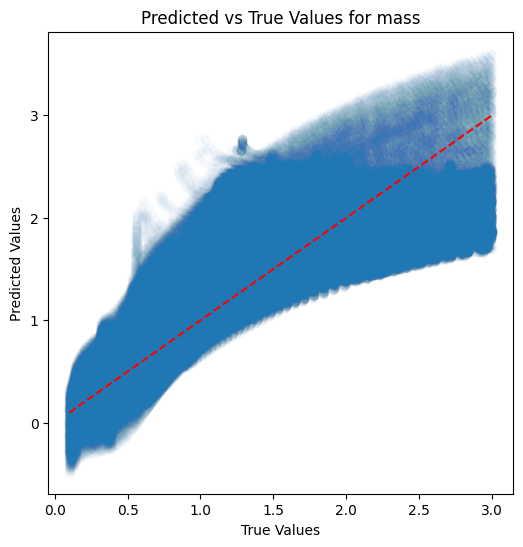

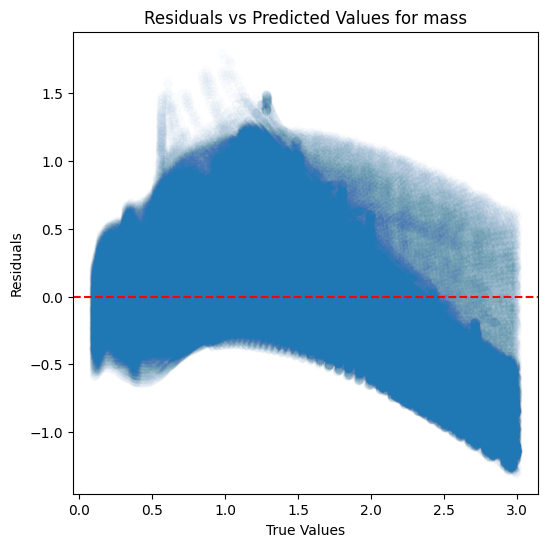

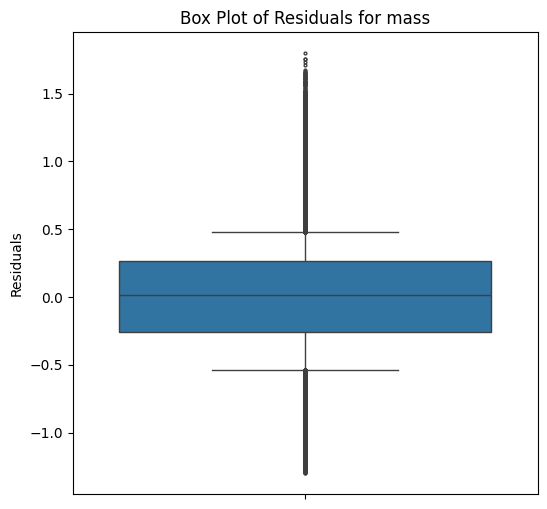

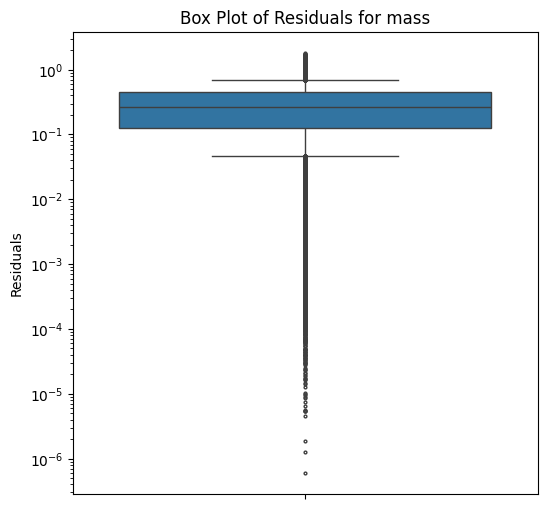

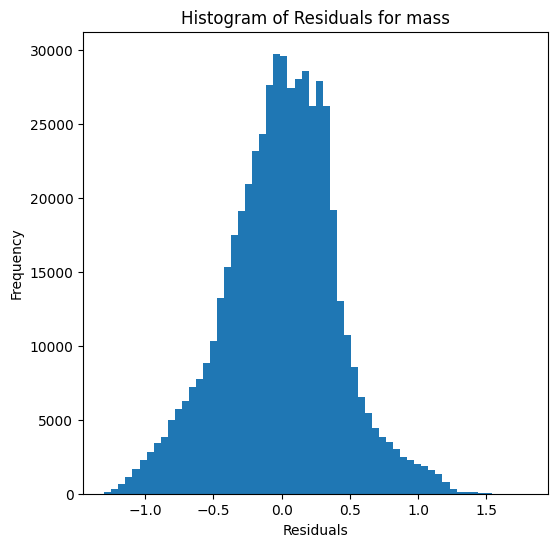

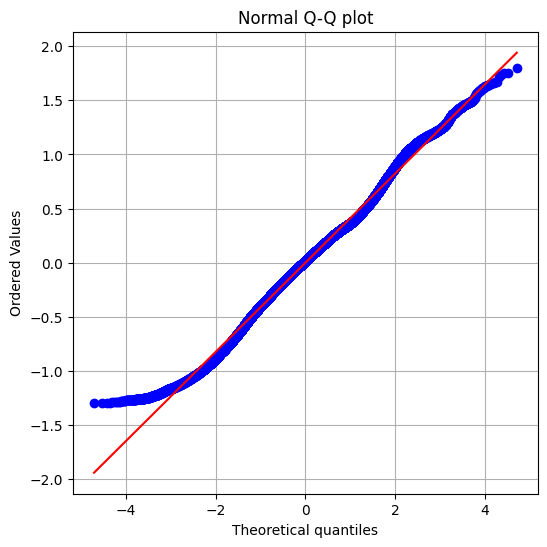


radius results:
RVE :  0.9958055391259805
RMSE :  0.066277386089521
MAE :  0.053263145810978754
MedAE :  0.04637850962108053
CORR :  0.9979005657509382
MAX_ER :  0.33904326041960253
Percentiles : 
  75th percentile :  0.0757663610892072
  90th percentile :  0.10583529175061678
  95th percentile :  0.1256336624934238
  99th percentile :  0.17662671765695898



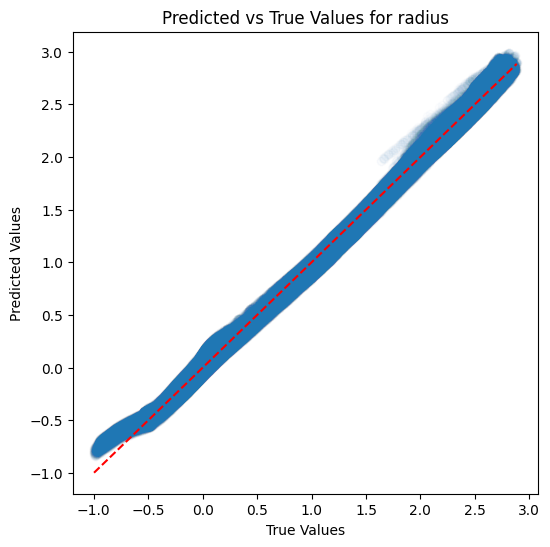

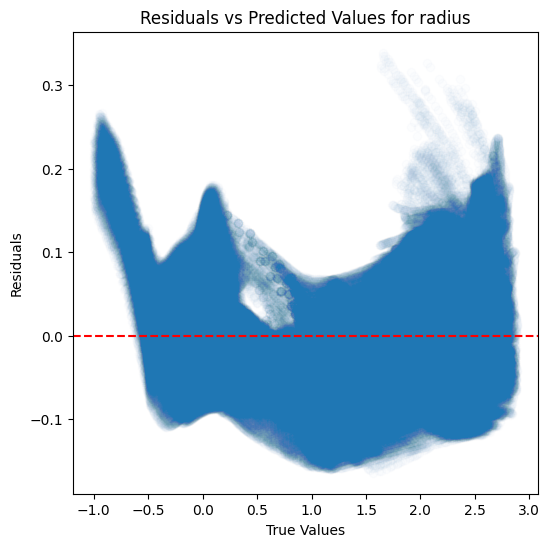

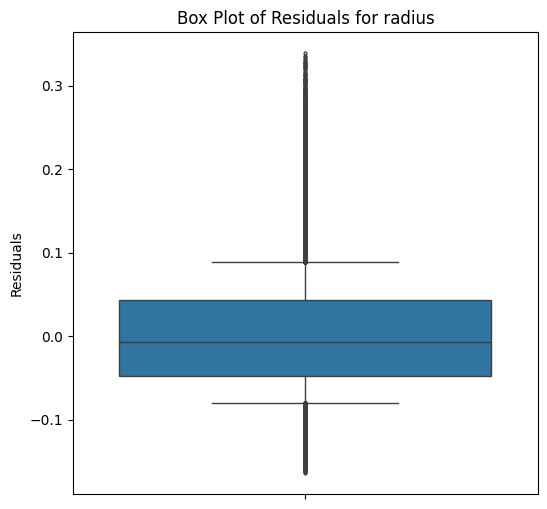

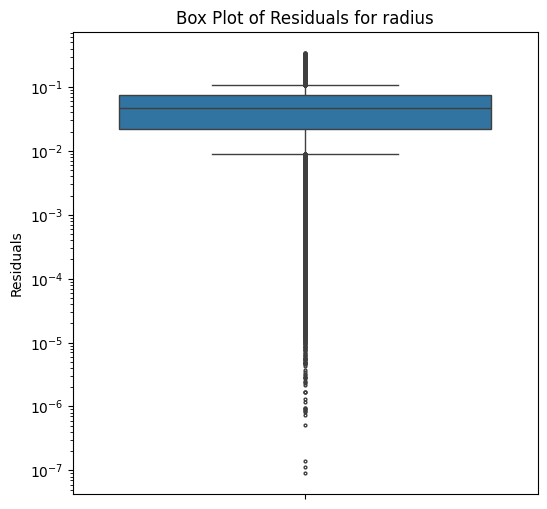

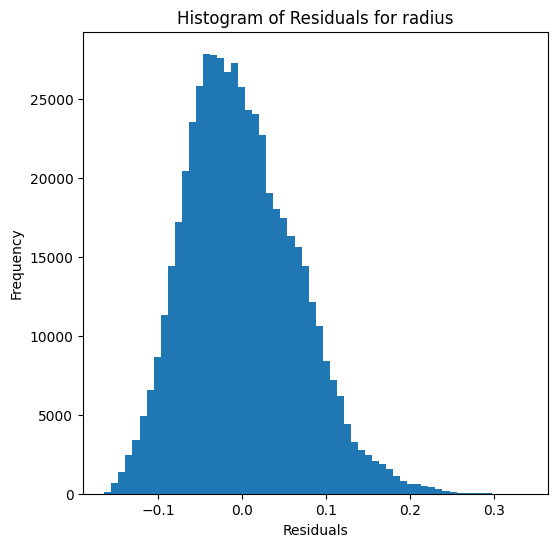

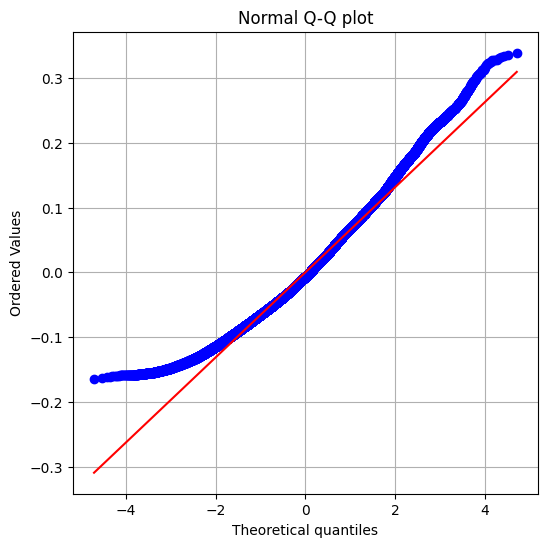

In [ ]:
lr_evaluator.evaluate_Kfold_results(LinearRegression, X_train, y_train, path_to_predictions, tag, random_state=12, override=True, use_preds=False) #, override=False, use_preds=True)

### Decision tree

In [ ]:
dt_evaluator = Model_evaluator("decision_tree", path=path_to_results, physical_model=physical_model)


mass_filtered_smaller_3 train data :
split 1 2 3 4 5 6 7 8 9 10 
mass results:
RVE :  0.9863740441698512
RMSE :  0.08065948176869223
MAE :  0.031153554944471182
MedAE :  0.004555084937894471
CORR :  0.9931827737651617
MAX_ER :  1.8233967225746763
Percentiles : 
  75th percentile :  0.023400605460702495
  90th percentile :  0.08818191937626563
  95th percentile :  0.16559166564657812
  99th percentile :  0.37045663375878146



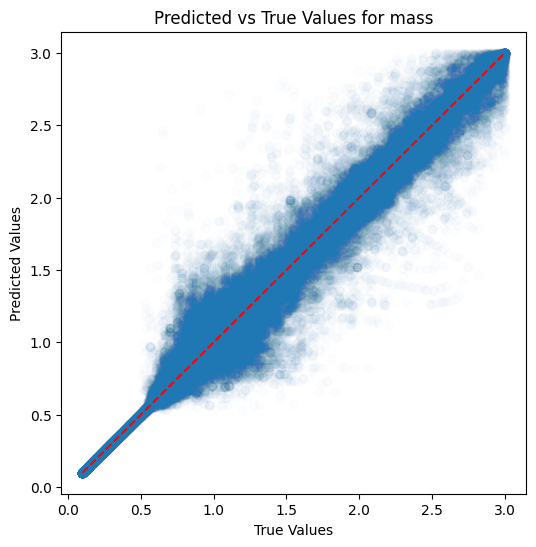

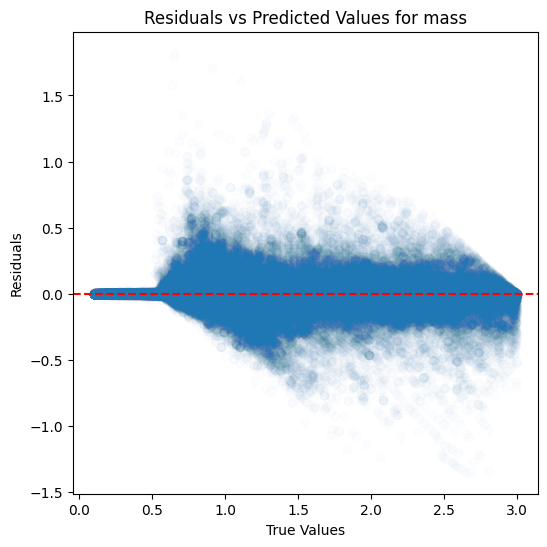

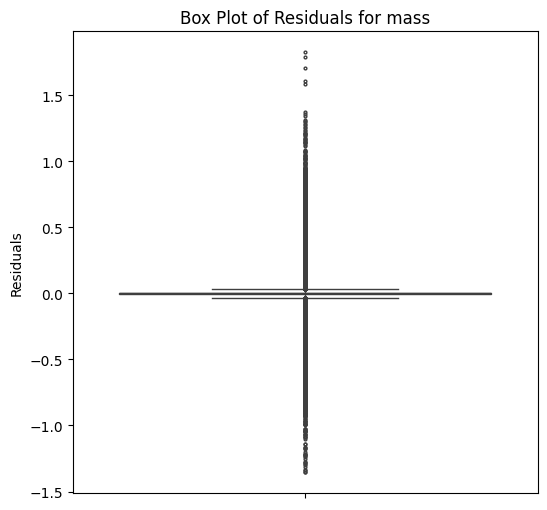

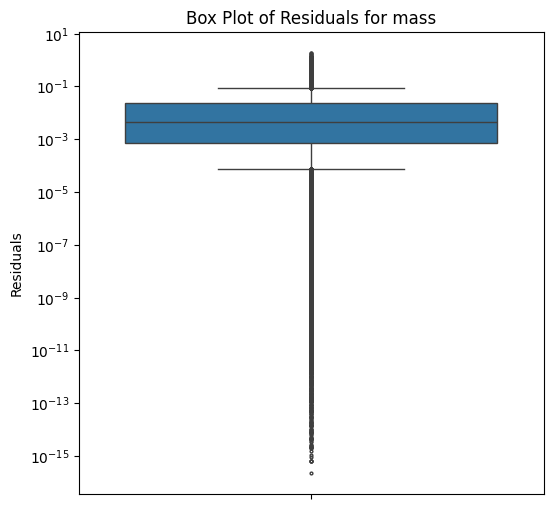

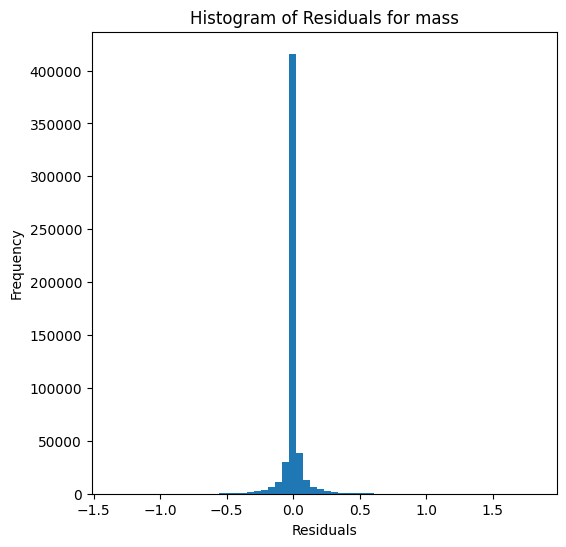

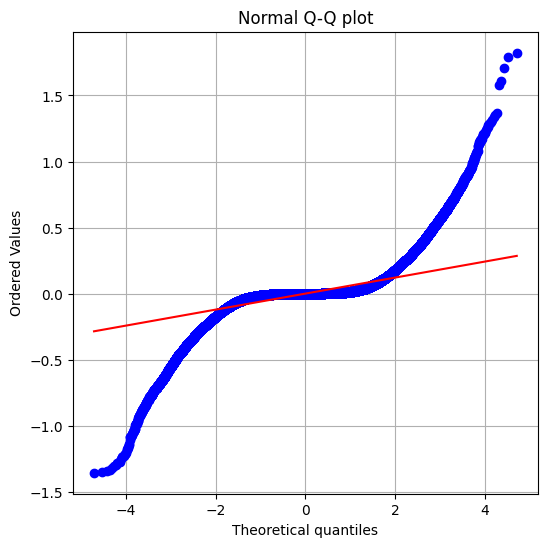


radius results:
RVE :  0.9997980449596693
RMSE :  0.014543308792759283
MAE :  0.007228490272178777
MedAE :  0.003128295879770482
CORR :  0.9998990515205088
MAX_ER :  0.2671235002295904
Percentiles : 
  75th percentile :  0.007742169317892844
  90th percentile :  0.016868358989310543
  95th percentile :  0.02834724467149825
  99th percentile :  0.06600400271517959



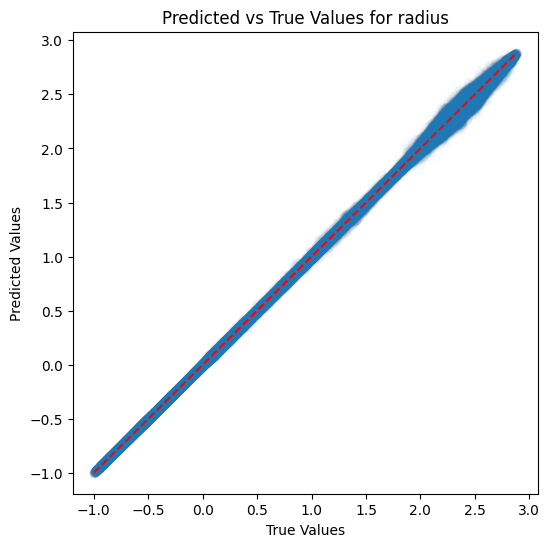

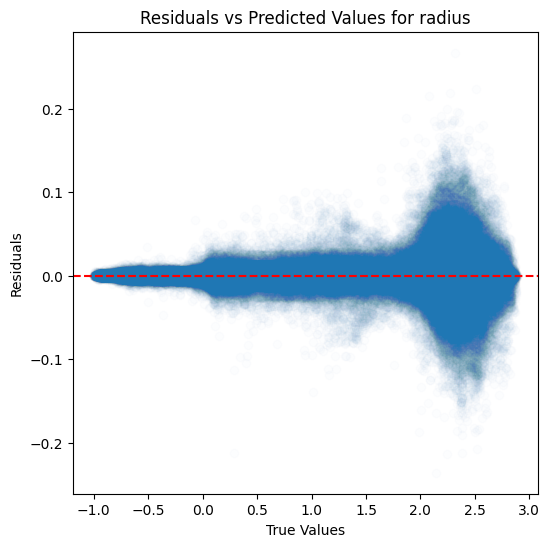

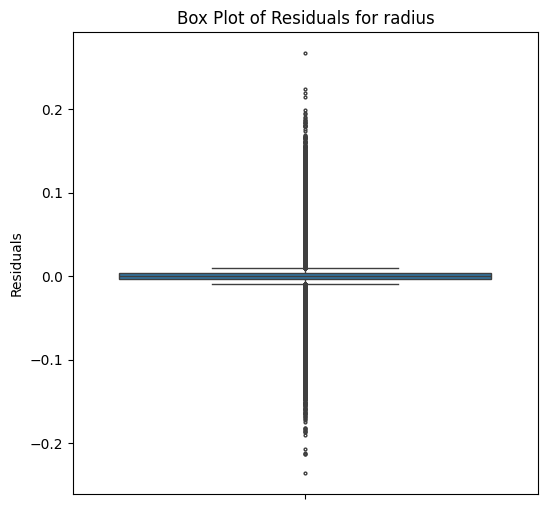

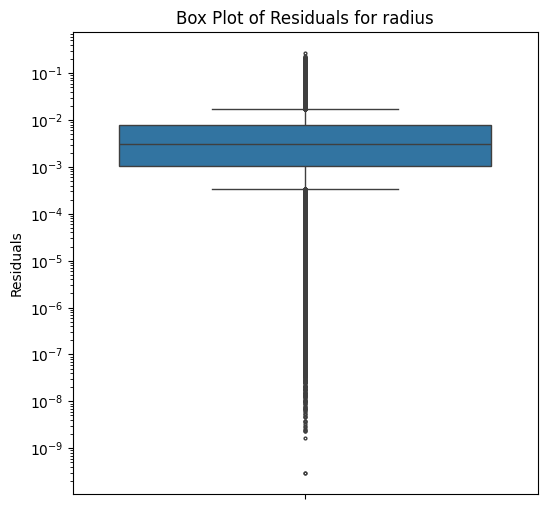

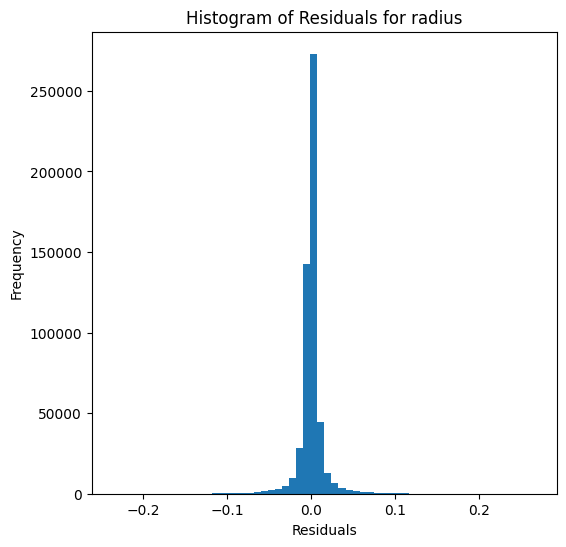

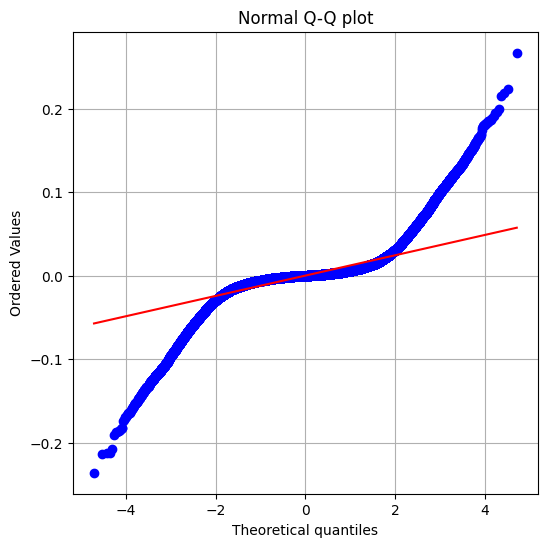

In [ ]:
dt_evaluator.evaluate_Kfold_results(DecisionTreeRegressor, X_train, y_train, path_to_predictions, tag, random_state=12, override=True, use_preds=False) #, override=False, use_preds=True)

### K-nearest neighbours

In [ ]:
knn_evaluator = Model_evaluator("KNN", path=path_to_results, physical_model=physical_model)


mass_filtered_smaller_3 train data :
split 1 2 3 4 5 6 7 8 9 10 
mass results:
RVE :  0.9851591018183086
RMSE :  0.08418684913784176
MAE :  0.040326938588368416
MedAE :  0.010978932468380997
CORR :  0.9925519255441945
MAX_ER :  1.5919104638650627
Percentiles : 
  75th percentile :  0.04252106198976002
  90th percentile :  0.11842541674209571
  95th percentile :  0.18504575839212567
  99th percentile :  0.3574981991975417



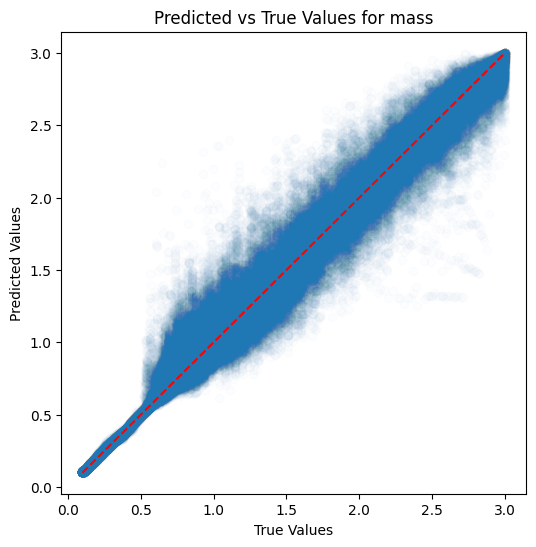

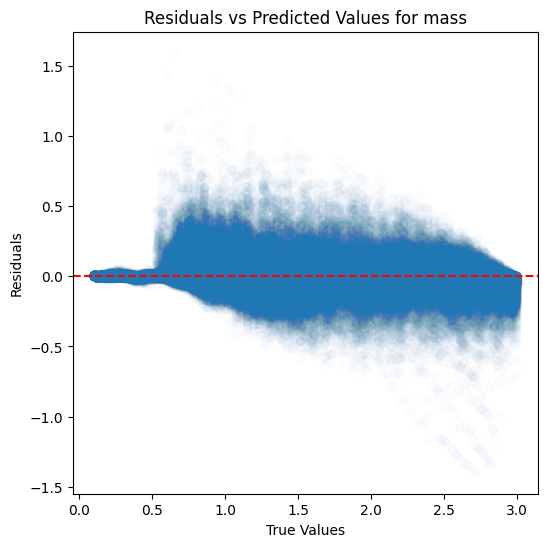

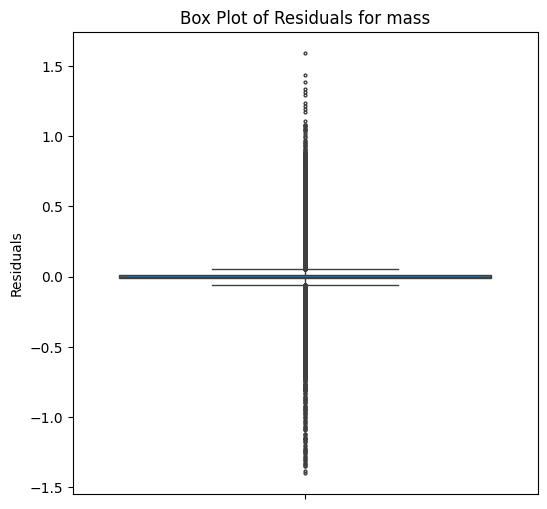

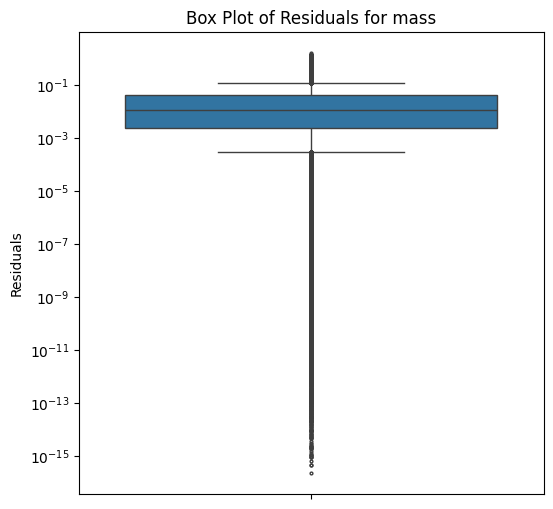

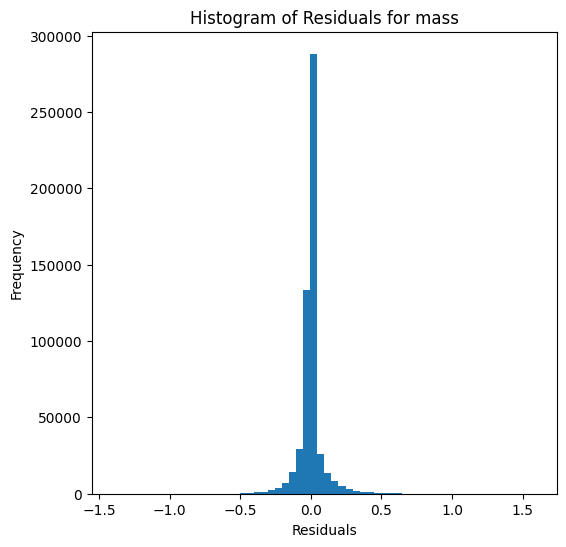

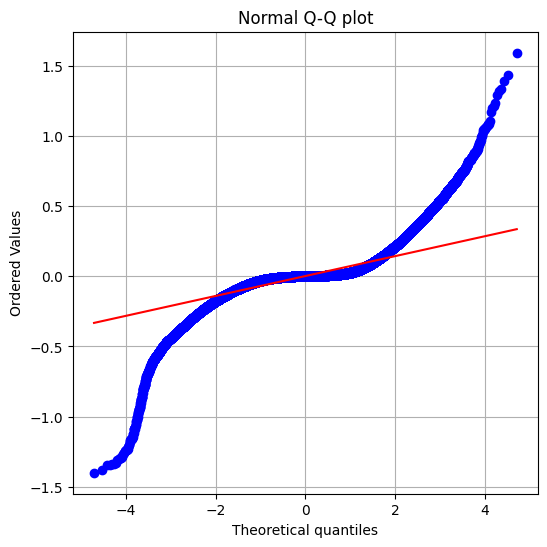


radius results:
RVE :  0.9998124002057707
RMSE :  0.014019621430573385
MAE :  0.007597533419531711
MedAE :  0.0034485702594244105
CORR :  0.999906207529898
MAX_ER :  0.26087605719507456
Percentiles : 
  75th percentile :  0.008594314484754478
  90th percentile :  0.019346486803666536
  95th percentile :  0.03016623615763068
  99th percentile :  0.05843496638138132



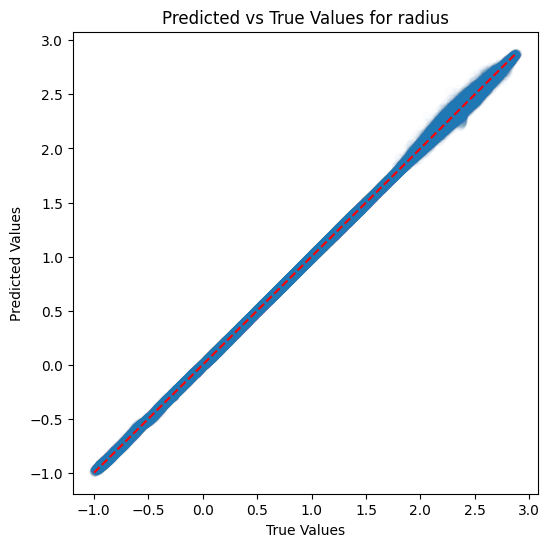

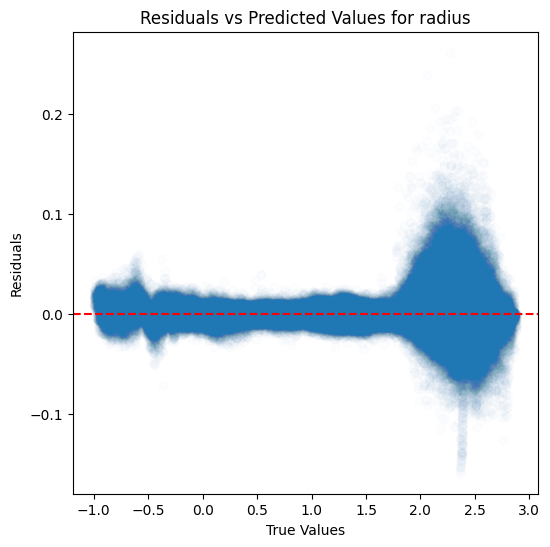

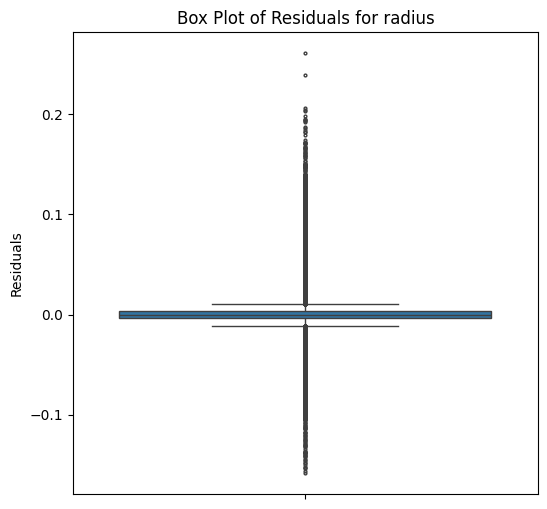

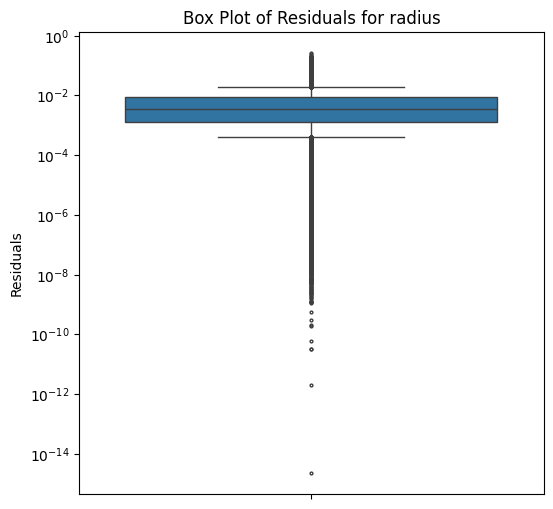

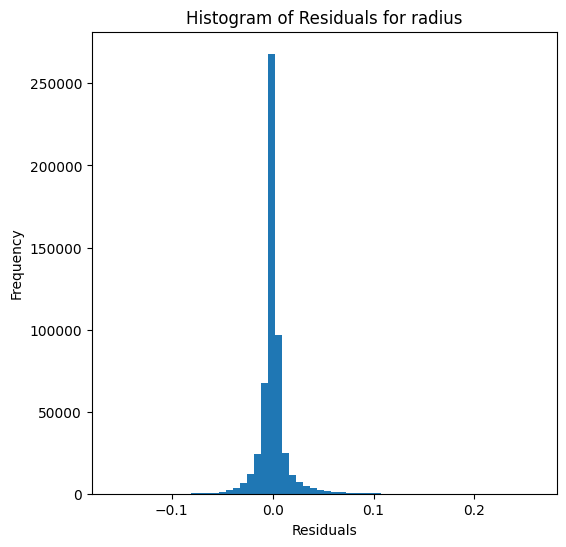

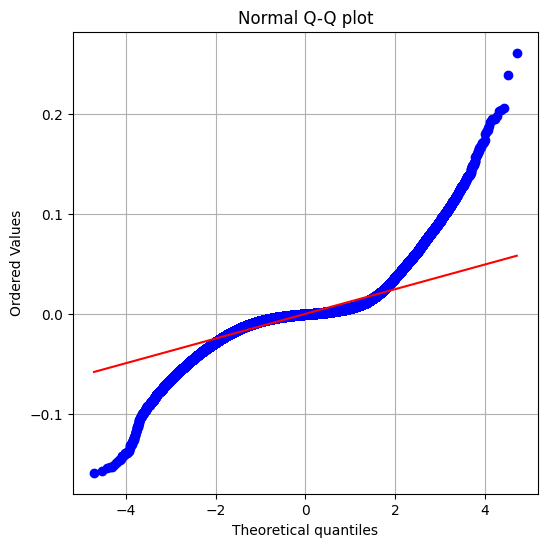

In [ ]:
knn_evaluator.evaluate_Kfold_results(KNeighborsRegressor, X_train, y_train, path_to_predictions, tag, random_state=12, override=True, use_preds=False) #, override=False, use_preds=True)

### Random forests

In [ ]:
rf_evaluator = Model_evaluator("random_forest", path=path_to_results, physical_model=physical_model)


mass_filtered_smaller_3 train data :
split 1 2 3 4 5 6 7 8 9 10 
mass results:
RVE :  0.9921007066355249
RMSE :  0.06141520595143782
MAE :  0.02741767026556641
MedAE :  0.006514018296374546
CORR :  0.9960429814270274
MAX_ER :  1.635305433062047
Percentiles : 
  75th percentile :  0.02696381660828412
  90th percentile :  0.07860996835074398
  95th percentile :  0.1282753374377581
  99th percentile :  0.26601105702515954



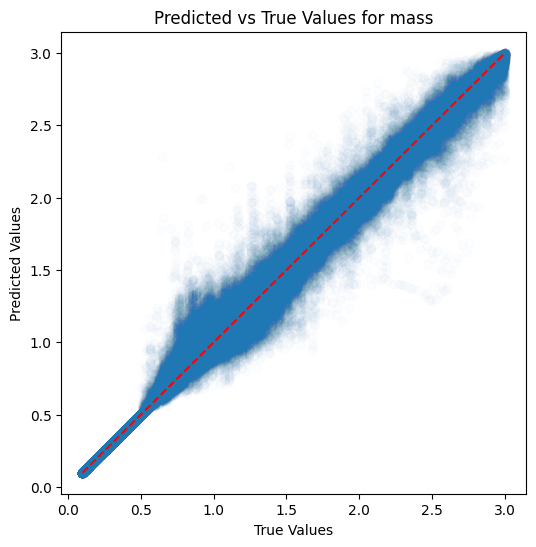

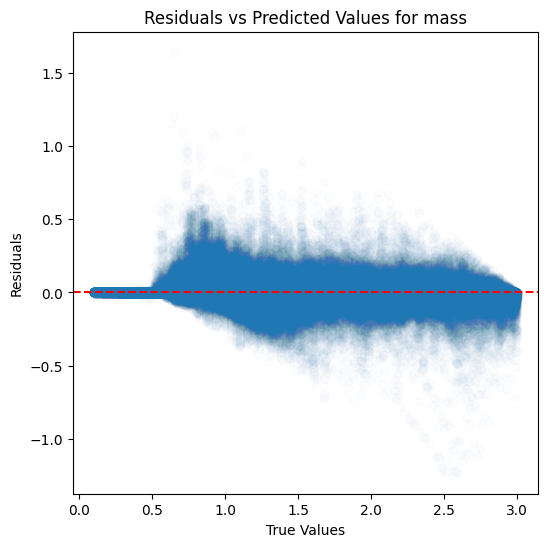

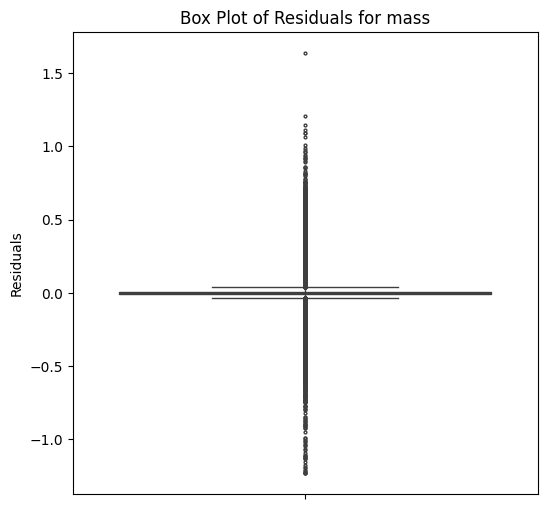

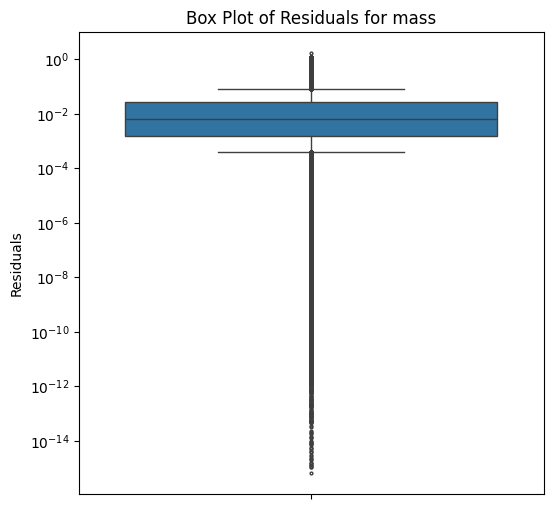

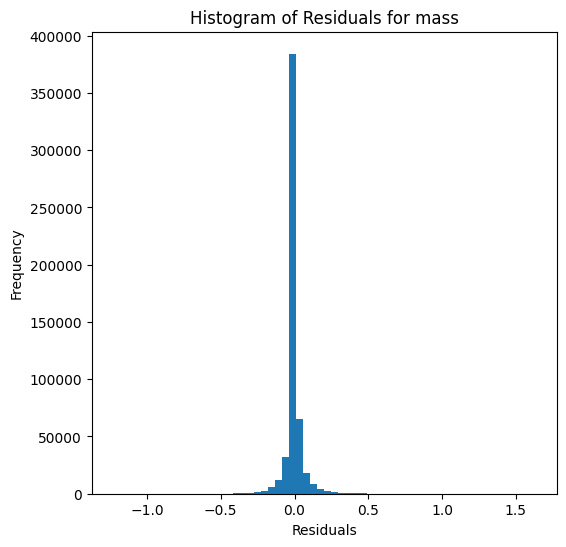

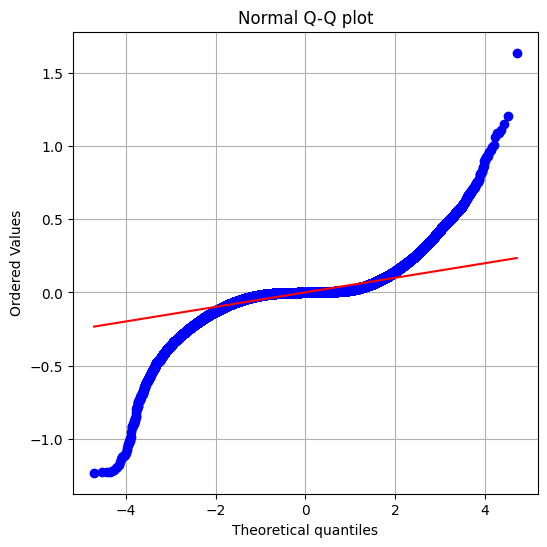


radius results:
RVE :  0.9998952156558059
RMSE :  0.010476065091138284
MAE :  0.005087489633142531
MedAE :  0.0018548895212230708
CORR :  0.9999476181402057
MAX_ER :  0.2375985416469213
Percentiles : 
  75th percentile :  0.00537074164852136
  90th percentile :  0.013183575852084585
  95th percentile :  0.021255410456846403
  99th percentile :  0.04618027187235004



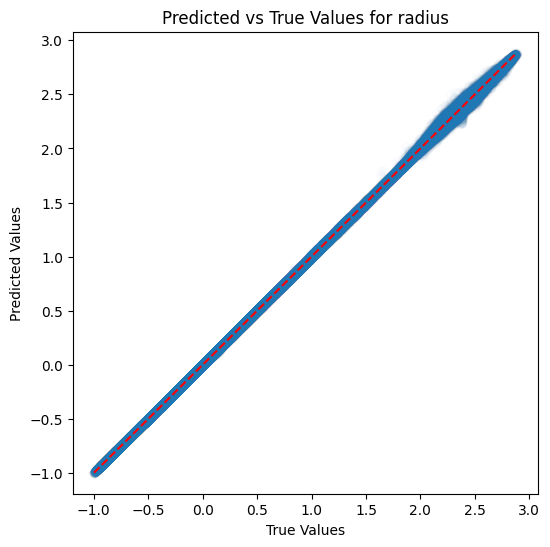

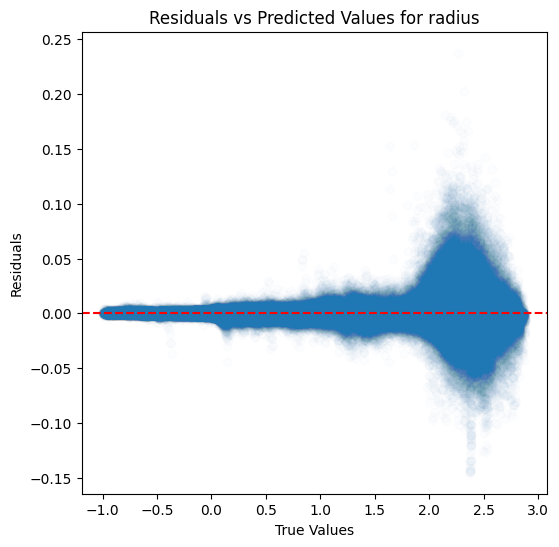

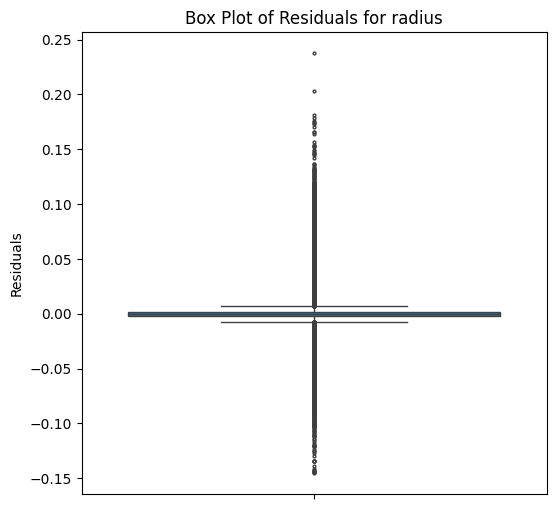

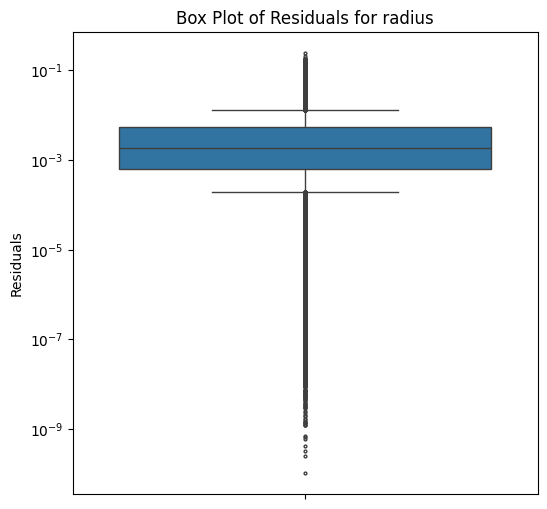

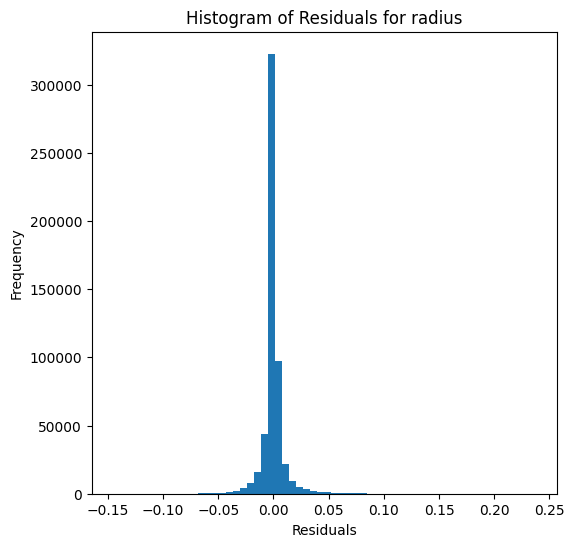

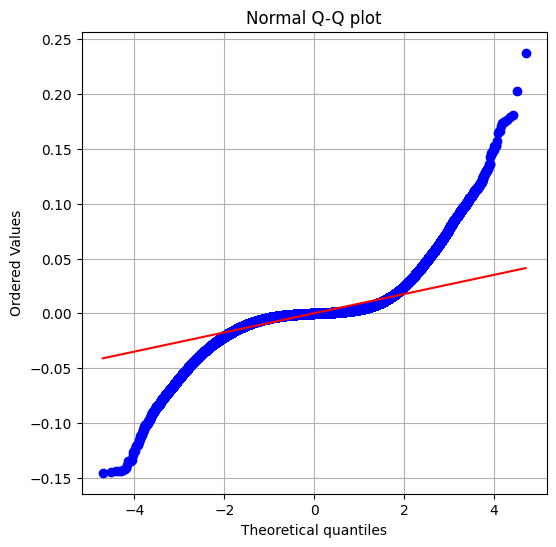

In [ ]:
rf_evaluator.evaluate_Kfold_results(RandomForestRegressor, X_train, y_train, path_to_predictions, tag, random_state=12, override=True, use_preds=False, n_jobs=5) #, override=False, use_preds=True)

### XGBoost

In [ ]:
xgb_evaluator = Model_evaluator("xgboost", path=path_to_results, physical_model=physical_model)


mass_filtered_smaller_3 train data :
split 1 2 3 4 5 6 7 8 9 10 
mass results:
RVE :  0.9823167084494933
RMSE :  0.09188510564815897
MAE :  0.05454334245066164
MedAE :  0.026503506362566043
CORR :  0.9911192313182378
MAX_ER :  1.1615402437900189
Percentiles : 
  75th percentile :  0.06810591620228007
  90th percentile :  0.14006342367135535
  95th percentile :  0.2073085947517214
  99th percentile :  0.3570443102833985



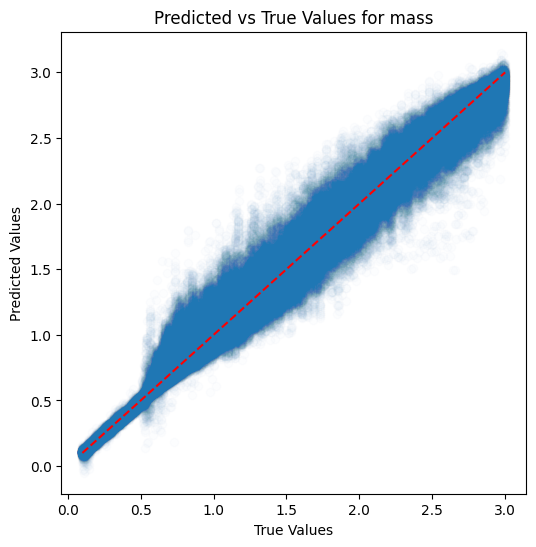

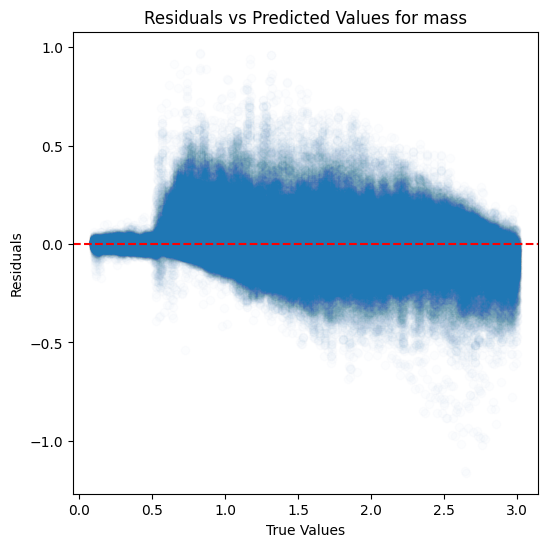

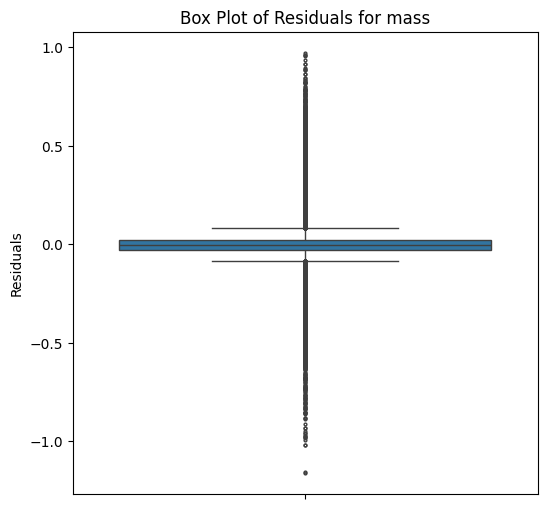

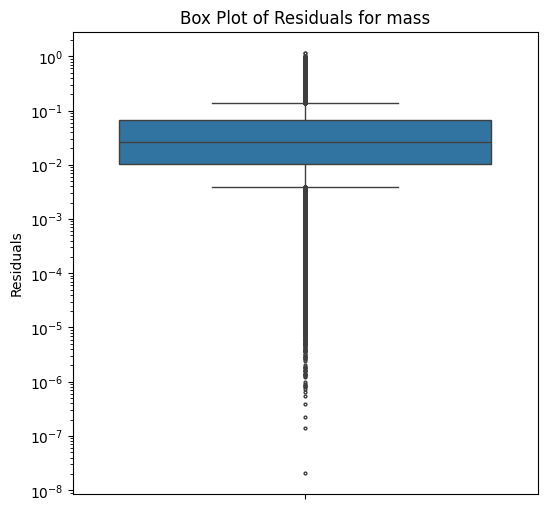

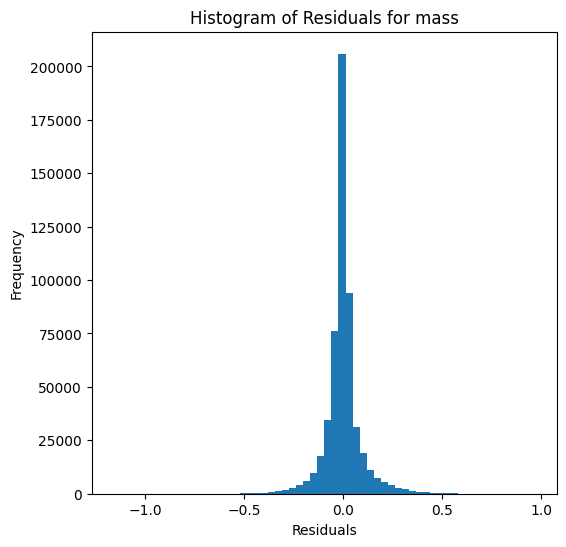

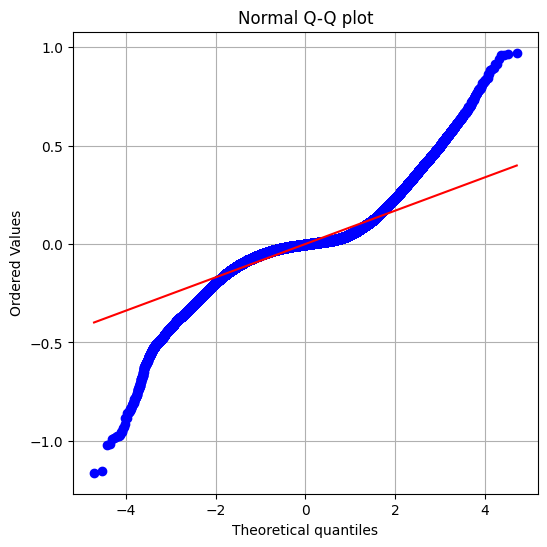


radius results:
RVE :  0.9997374331207423
RMSE :  0.01658239941408444
MAE :  0.011554286239594626
MedAE :  0.008178448361610302
CORR :  0.9998687083705904
MAX_ER :  0.17234105618015816
Percentiles : 
  75th percentile :  0.015199942140796452
  90th percentile :  0.02522669175591093
  95th percentile :  0.03413424251735102
  99th percentile :  0.05842059286578107



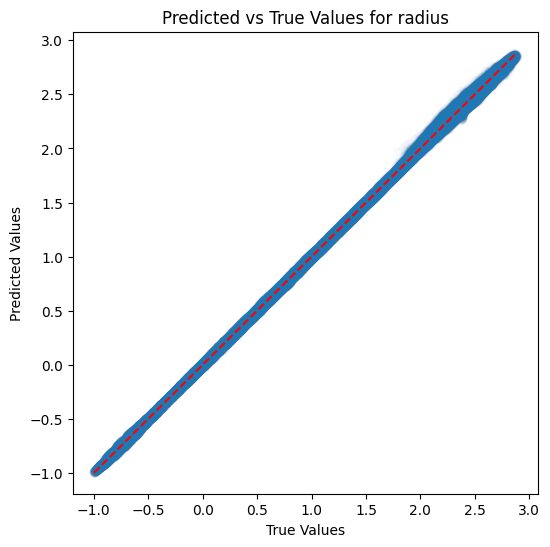

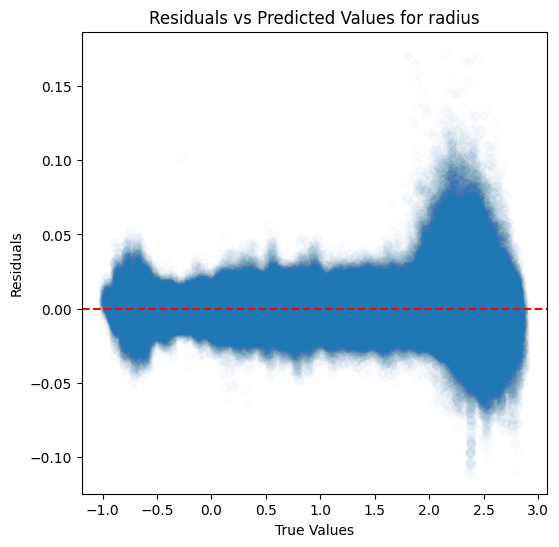

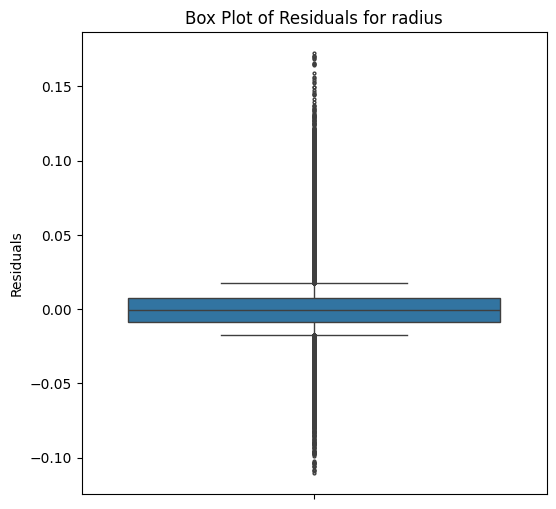

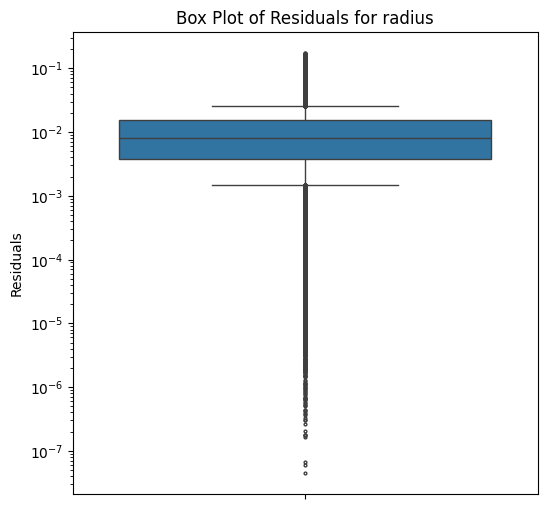

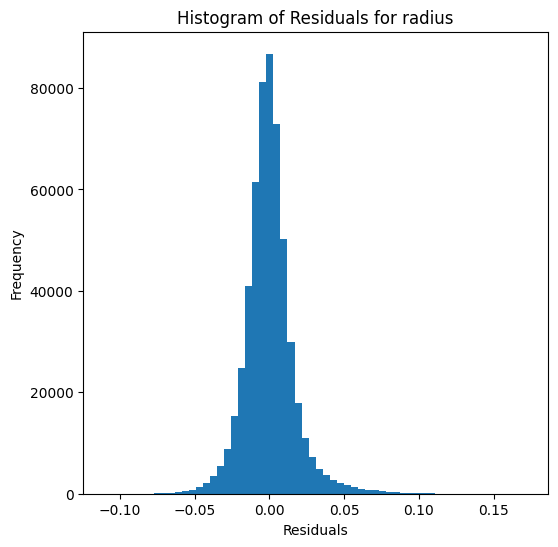

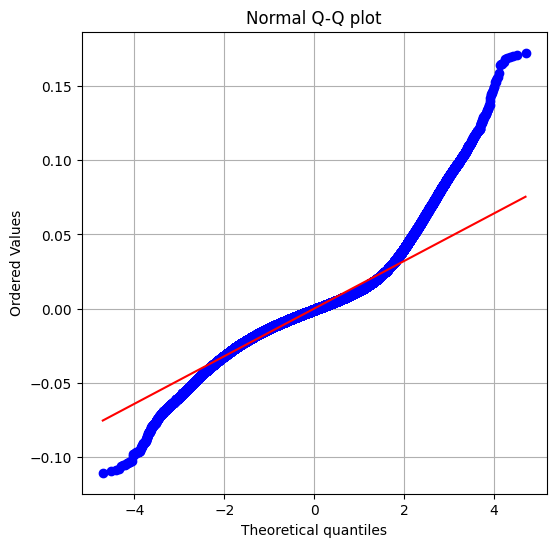

In [ ]:
xgb_evaluator.evaluate_Kfold_results(XGBRegressor, X_train, y_train, path_to_predictions, tag, random_state=12, override=True, use_preds=False, n_jobs=5) #, override=False, use_preds=True)

### Multi-layer perceptron

In [ ]:
mlp_evaluator = Model_evaluator("mlp", path=path_to_results, physical_model=physical_model)


mass_filtered_smaller_3 train data :
split 1 

c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


0.0037162379870514448
2 

c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


0.003772082181021959
3 

c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


0.003724728081691509
4 0.0038526295341148446
5 

c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


0.0038549300450557537

mass results:
RVE :  0.9649058531577546
RMSE :  0.12947973708308194
MAE :  0.08171001400272891
MedAE :  0.048495481317905265
CORR :  0.9823117948691011
MAX_ER :  2.493348794595222
Percentiles : 
  75th percentile :  0.10175205306395813
  90th percentile :  0.19398735791558022
  95th percentile :  0.27779046484779985
  99th percentile :  0.4632703260294115



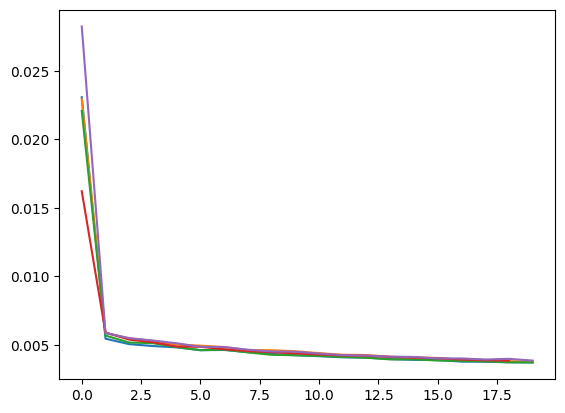

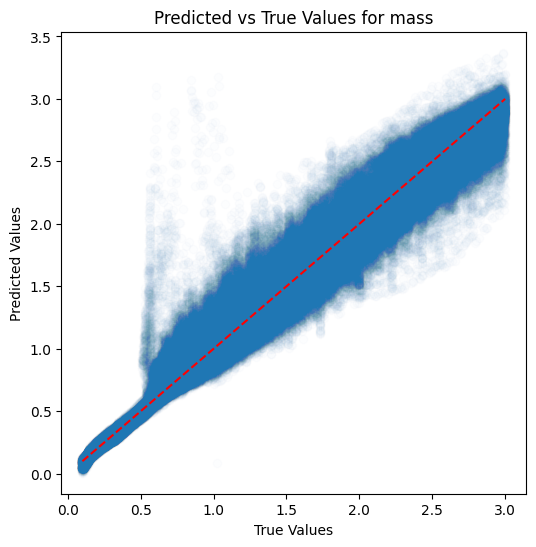

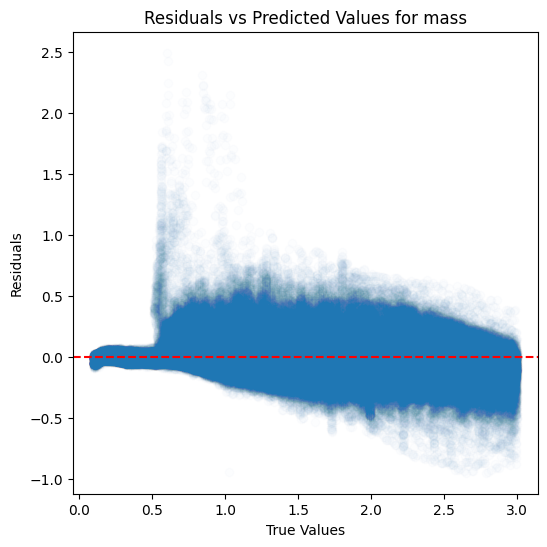

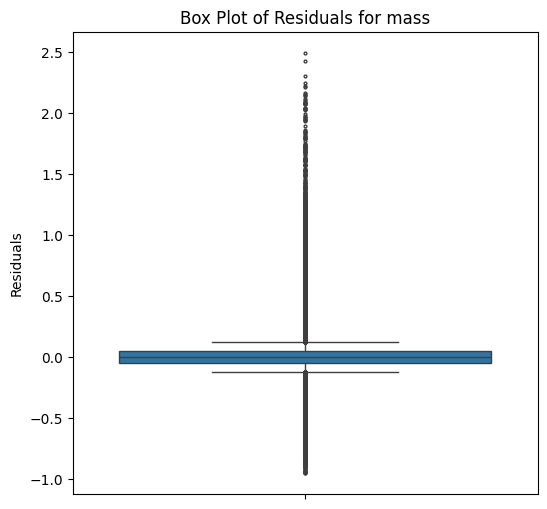

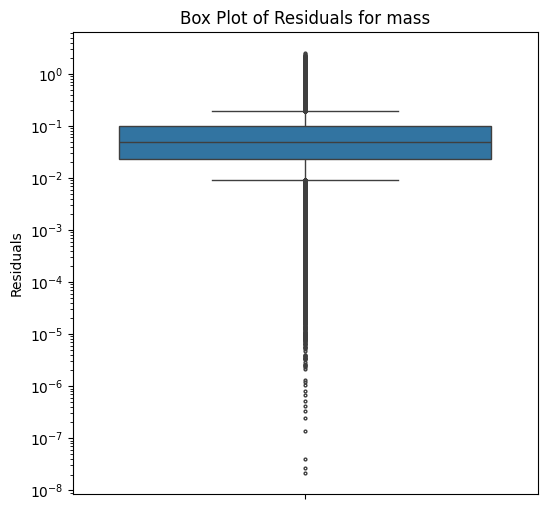

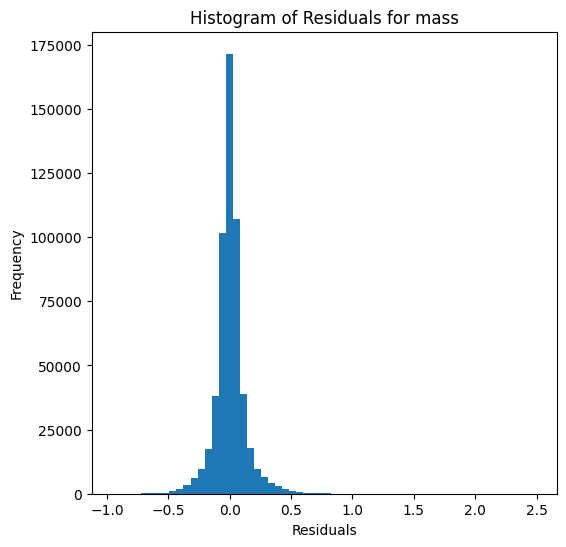

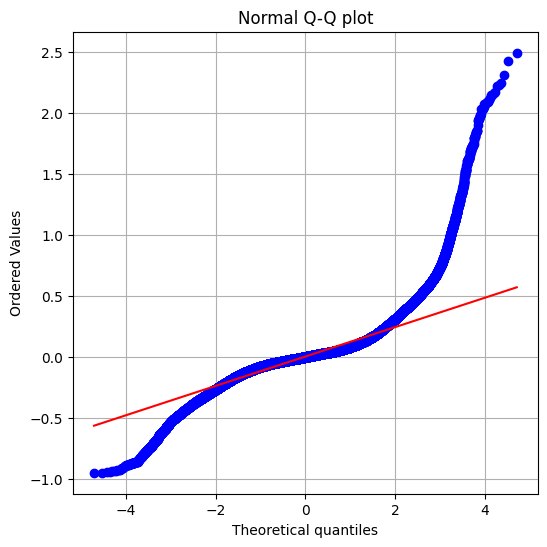


radius results:
RVE :  0.9994078667866224
RMSE :  0.02789966474335524
MAE :  0.02020179317089933
MedAE :  0.015852780427029645
CORR :  0.999703950192692
MAX_ER :  0.4480227615076733
Percentiles : 
  75th percentile :  0.027206807464281127
  90th percentile :  0.041631258936256854
  95th percentile :  0.053221552092105585
  99th percentile :  0.08471682532747069



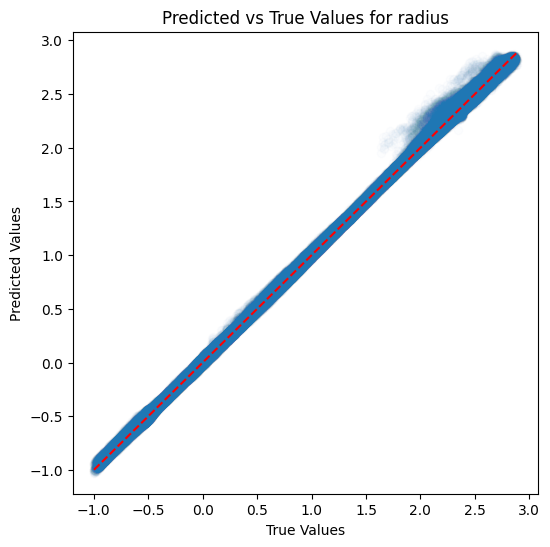

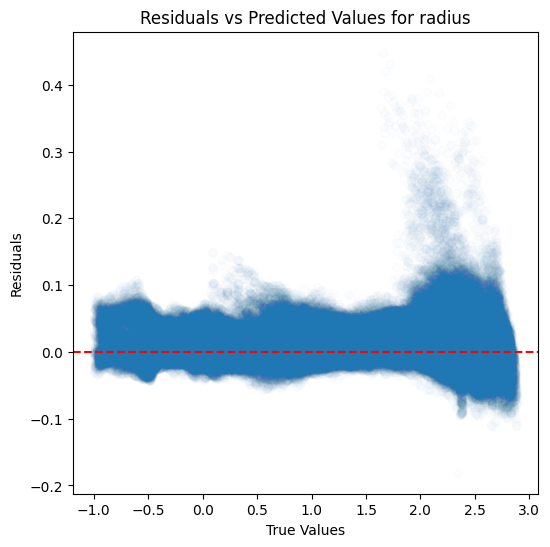

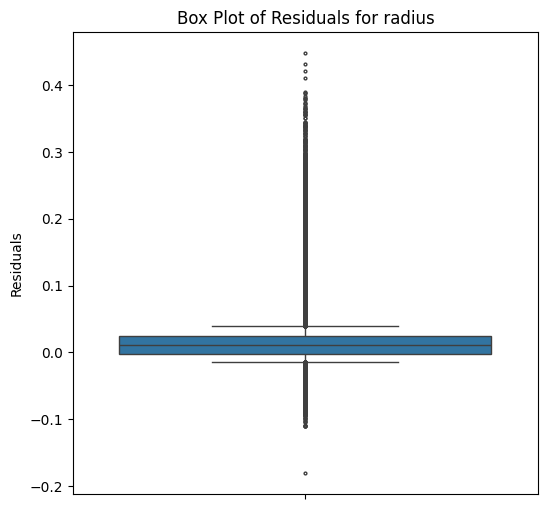

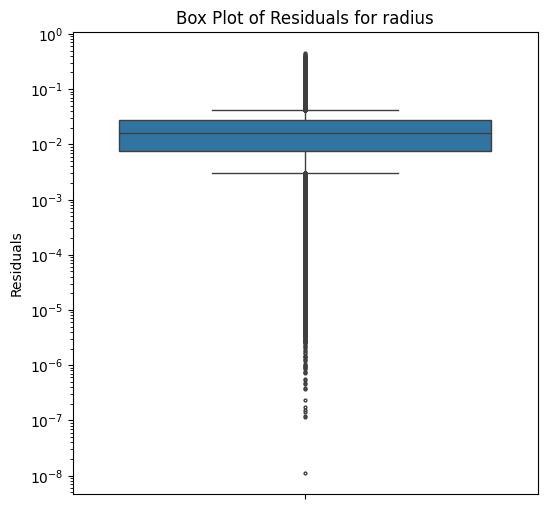

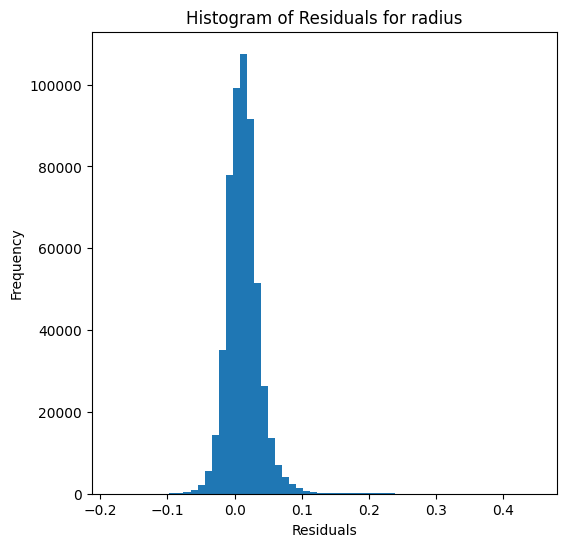

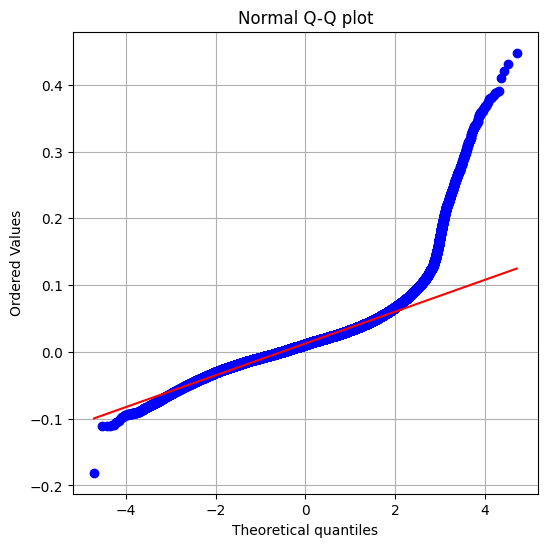

In [ ]:
mlp_evaluator.evaluate_Kfold_results(MLPRegressor, X_train, y_train, path_to_predictions, tag, n_splits=5, random_state=12, override=True, use_preds=False, hidden_layer_sizes = (100, 100, 100, 100), max_iter=20, batch_size=400) #, override=False, use_preds=True)